## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#To display all the columns of a dataframe
pd.pandas.set_option('display.max_columns',None)

### Loading the Data

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
raw_data.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

## Steps we're going to follow:
<ol>
    <li>Missing Value Analysis : 
        <ul>
            <li>Missing value percentage</li>
            <li>Relationship with missing values</li>
            <li>Imputing Missing Values</li>
        </ul>
    </li>
    <li>Exploratory Data Analysis
        <ul>
            <li>Types of Features</li>
            <li>Distribution of Continuous Features</li>
        </ul>
    </li>
    <li>Outlier Analysis</li>
</ol>

## Missing Value Analysis:

In [4]:
raw_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Clearly there are some features with missing values, So lets fetch the feature names.

In [5]:
features_with_na = [feature for feature in raw_data.columns if raw_data[feature].isna().sum()>1]
features_with_na,len(features_with_na)

(['LotFrontage',
  'Alley',
  'MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PoolQC',
  'Fence',
  'MiscFeature'],
 18)

Let's check the percentage of missing values in each of these features (along with their data type).

In [6]:
for feature in features_with_na:
    if raw_data[feature].isna().sum() > 1:
        perc = np.round((raw_data[feature].isna().sum()/len(raw_data))*100,2)
        print('{} ({}) : {}%'.format(feature,raw_data[feature].dtype,perc))

LotFrontage (float64) : 17.74%
Alley (object) : 93.77%
MasVnrType (object) : 0.55%
MasVnrArea (float64) : 0.55%
BsmtQual (object) : 2.53%
BsmtCond (object) : 2.53%
BsmtExposure (object) : 2.6%
BsmtFinType1 (object) : 2.53%
BsmtFinType2 (object) : 2.6%
FireplaceQu (object) : 47.26%
GarageType (object) : 5.55%
GarageYrBlt (float64) : 5.55%
GarageFinish (object) : 5.55%
GarageQual (object) : 5.55%
GarageCond (object) : 5.55%
PoolQC (object) : 99.52%
Fence (object) : 80.75%
MiscFeature (object) : 96.3%


Features having more than 60% of missing values should be dropped, as they can't be imputed.

In [7]:
raw_data = raw_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1)

In [8]:
features_with_na = [feature for feature in raw_data.columns if raw_data[feature].isna().sum()>1]
len(features_with_na)

14

### Checking relationship of SalePrice with missing values

Let's replace missing values with 0 and others with 1.

In [9]:
copy_df = raw_data.copy()
for feature in features_with_na:
    copy_df[feature] = np.where(copy_df[feature].isna(),0,1)

copy_df[features_with_na].head()

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,1,1,1,1,1,1,1,1,0,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
copy_df.groupby('LotFrontage')['SalePrice'].mean()

LotFrontage
0    181620.073359
1    180770.480433
Name: SalePrice, dtype: float64

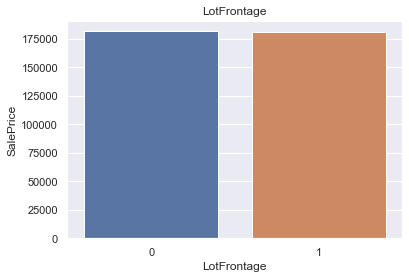

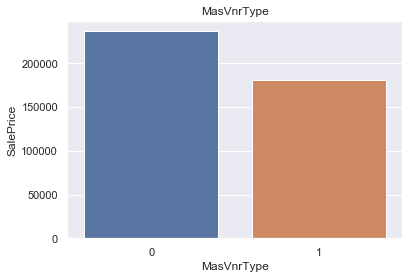

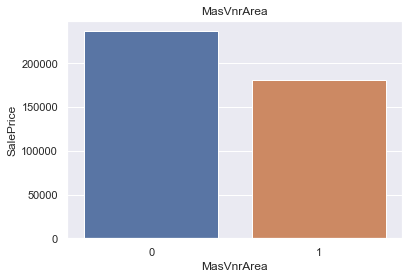

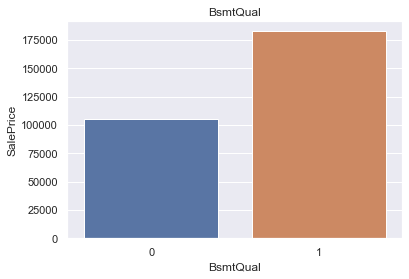

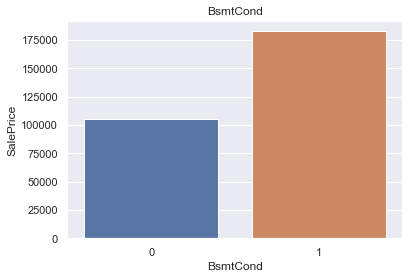

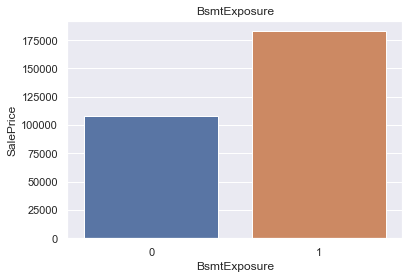

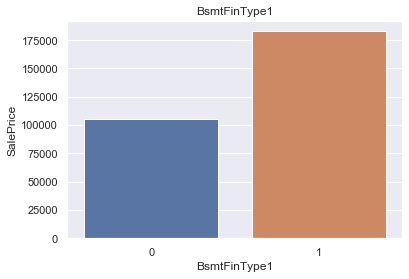

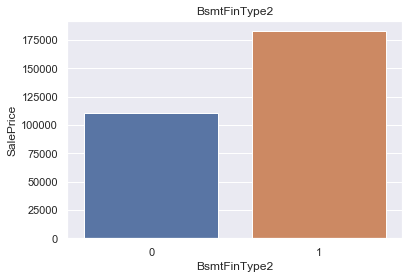

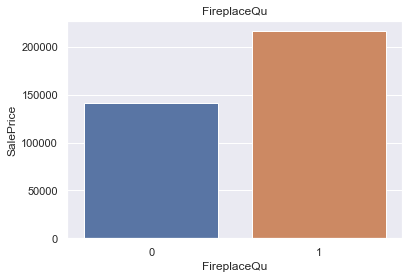

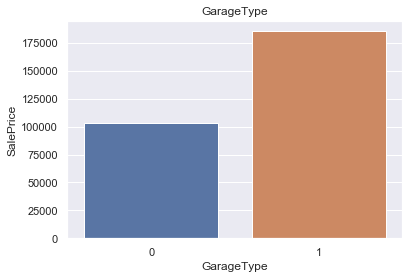

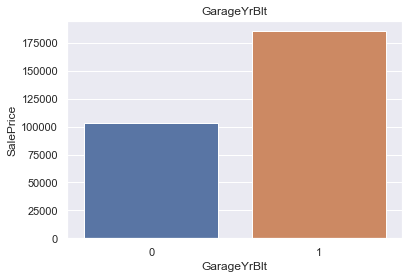

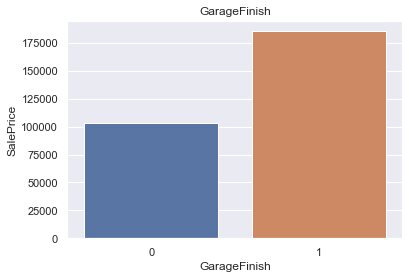

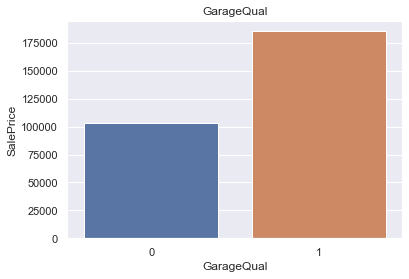

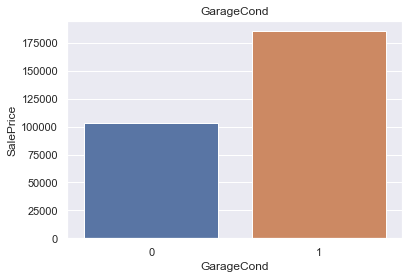

In [11]:
for feature in features_with_na:
    x = copy_df.groupby(feature)['SalePrice'].mean()
    sns.barplot(x.index,x.values)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Clearly there exists a relationship between missing values and Sale Price.

All the categorical features with missing values are having relationship with saleprice. So we will create a new category in each of them 'NA'.

**Categorical Features with NA**

In [12]:
for feature in features_with_na:
    if raw_data[feature].dtype == 'O':
        print(feature)
        raw_data[feature] = raw_data[feature].fillna('NA')

MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond


In [13]:
categorical_features = [feature for feature in raw_data.columns if raw_data[feature].dtype == 'O']
categorical_features,len(categorical_features)

(['MSZoning',
  'Street',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'SaleType',
  'SaleCondition'],
 39)

**Rare Categorical Values**

In [14]:
#We'll check for categories that are less than 1% in the feature column and replace them with Rare category.
raw_data.groupby('GarageCond')['SalePrice'].count()/len(raw_data)

GarageCond
Ex    0.001370
Fa    0.023973
Gd    0.006164
NA    0.055479
Po    0.004795
TA    0.908219
Name: SalePrice, dtype: float64

In [15]:
for feature in categorical_features:
    temp=raw_data.groupby(feature)['SalePrice'].count()/len(raw_data)
    temp_df=temp[temp>0.01].index
    raw_data[feature]=np.where(raw_data[feature].isin(temp_df),raw_data[feature],'Rare_var')

In [16]:
raw_data[categorical_features].head(20)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Rare_var,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Attchd,Unf,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Rare_var,2fmCon,Rare_var,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Rare_var,TA,Y,WD,Normal


**Numerical Features with NA**

In [17]:
for feature in features_with_na:
    if raw_data[feature].dtype != 'O':
        print(feature)

LotFrontage
MasVnrArea
GarageYrBlt


**LotFrontage** (here missing values isnt having any relationship with the target feature)

In [18]:
raw_data['LotFrontage'] = raw_data['LotFrontage'].fillna(raw_data['LotFrontage'].median()) 

#### GarageYrBlt

In [19]:
raw_data['GarageYrBlt'] = raw_data['GarageYrBlt'].fillna(np.round(raw_data['GarageYrBlt'].median())) 

#### MasVnrArea

In [20]:
raw_data['MasVnrArea'] = raw_data['MasVnrArea'].fillna(raw_data['MasVnrArea'].median()) 

In [21]:
raw_data[features_with_na].head()

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,NA,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,2000.0,RFn,TA,TA


In [22]:
raw_data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [23]:
raw_data = raw_data.drop('Id' , axis = 1)

In [24]:
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

There are three type of features in our dataset: <br>
<ol>
    <li>Numerical:
        <ul>
            <li>Discrete</li>
            <li>Continuous</li>
        </ul>
    </li>
    <li>Categorical</li>
    <li>Temporal</li>
</ol>

In [25]:
len(raw_data.columns)

76

#### Categorical Variables

In [26]:
categorical_features = [feature for feature in raw_data.columns if raw_data[feature].dtype == 'O']
len(categorical_features)

39

In [27]:
raw_data[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


**Frequency of each category**

In [28]:
for feature in categorical_features:
    print(feature,len(raw_data[feature].unique()))

MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 23
Condition1 6
Condition2 2
BldgType 5
HouseStyle 6
RoofStyle 3
RoofMatl 2
Exterior1st 11
Exterior2nd 11
MasVnrType 5
ExterQual 4
ExterCond 4
Foundation 5
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 3
HeatingQC 5
CentralAir 2
Electrical 4
KitchenQual 4
Functional 5
FireplaceQu 6
GarageType 6
GarageFinish 4
GarageQual 4
GarageCond 4
PavedDrive 3
SaleType 4
SaleCondition 5


**Relationship of categorical features with SalePrice**

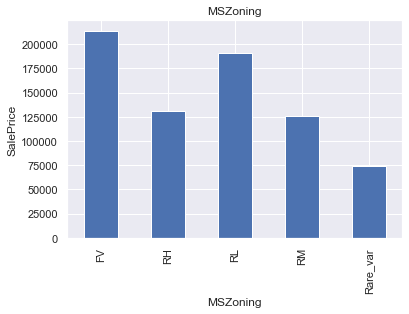

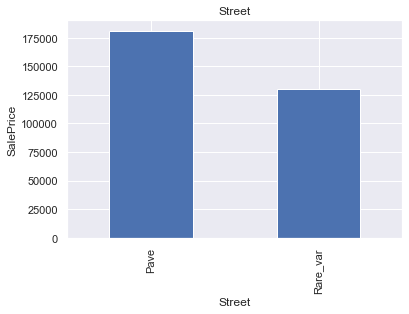

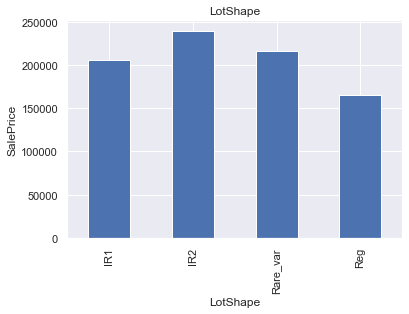

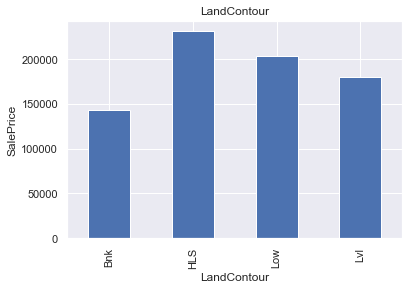

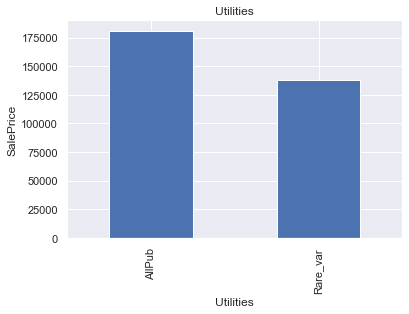

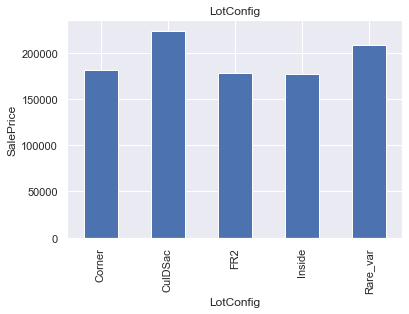

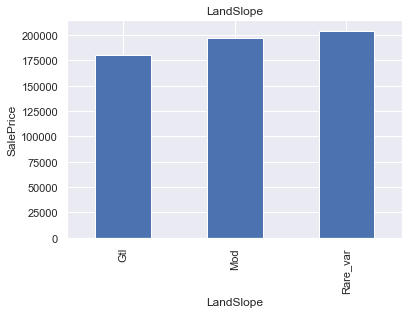

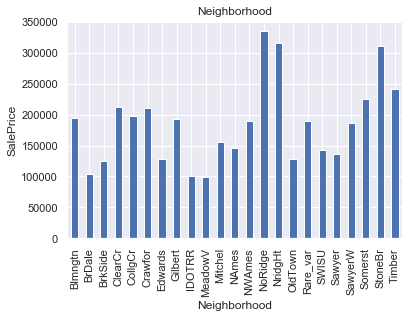

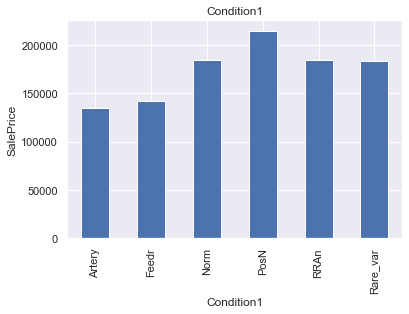

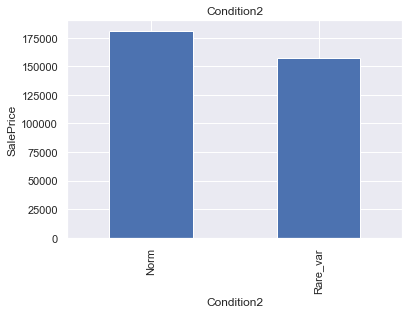

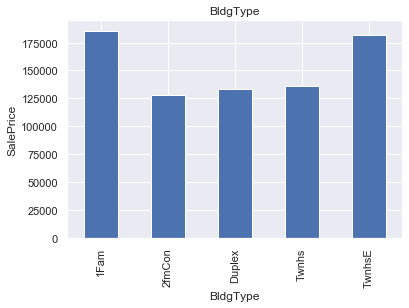

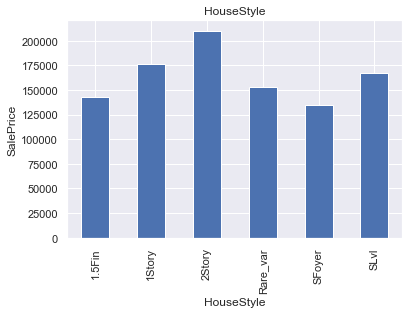

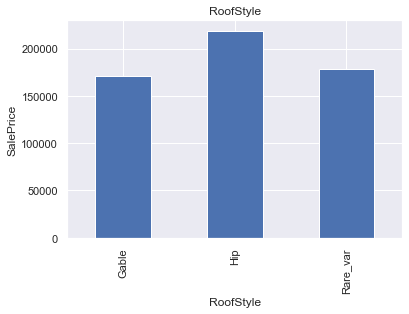

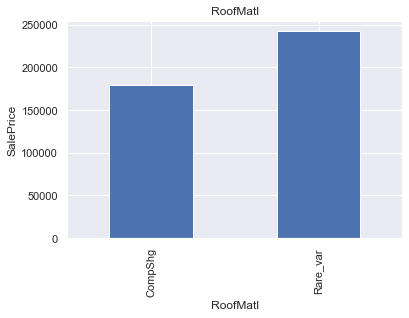

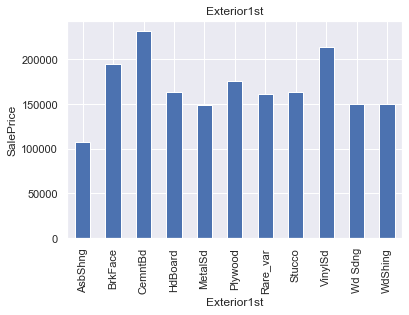

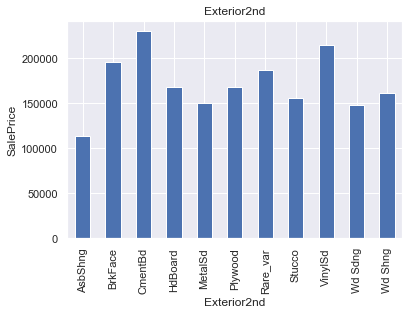

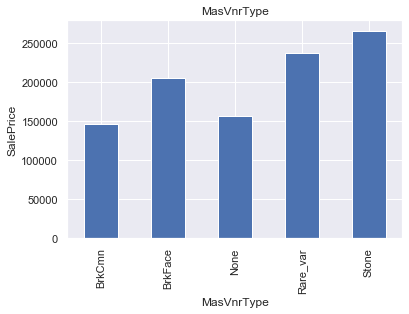

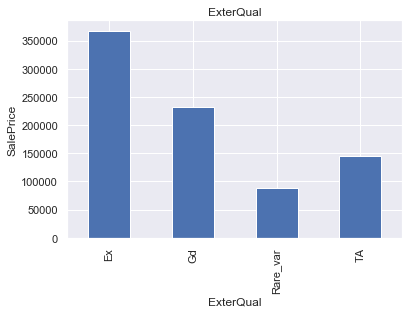

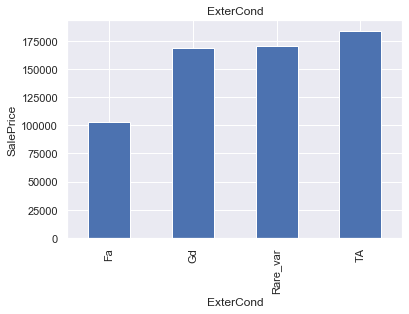

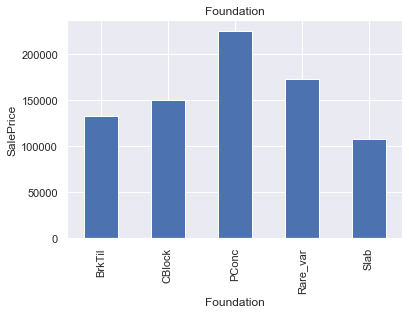

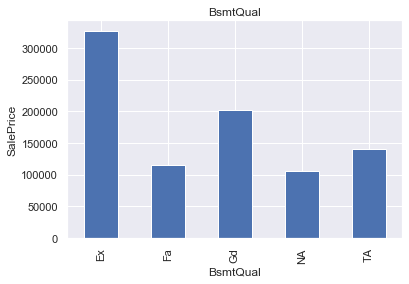

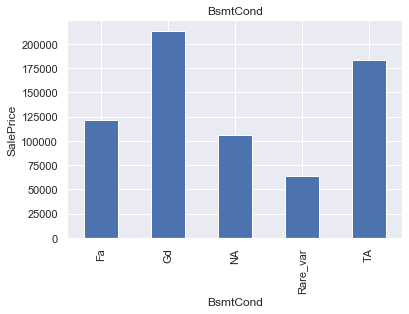

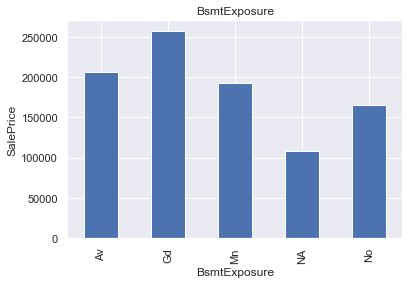

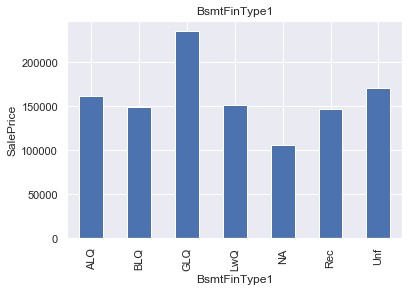

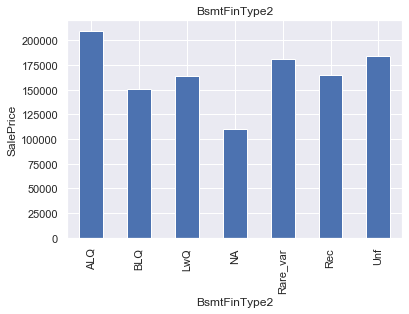

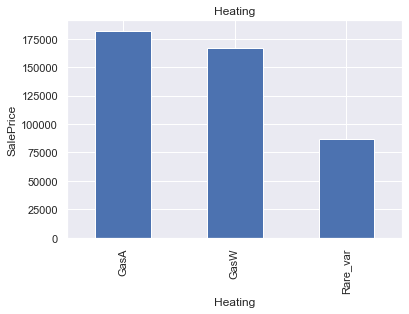

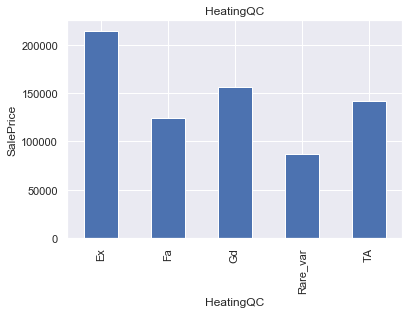

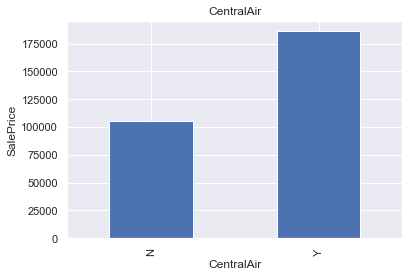

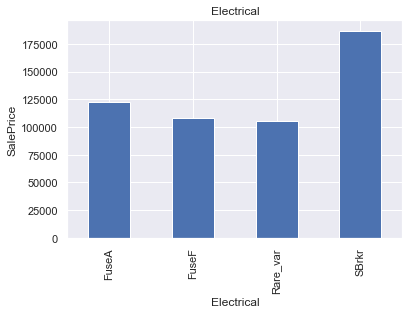

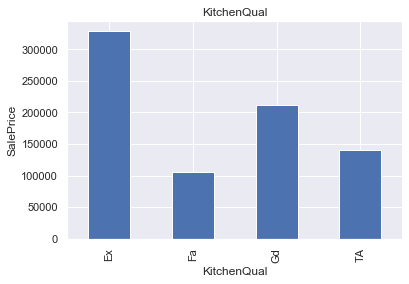

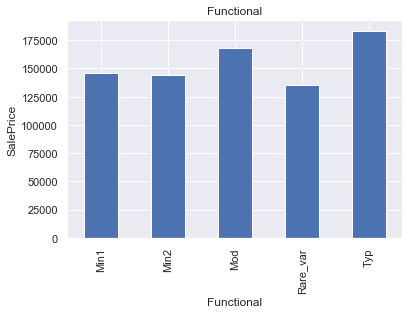

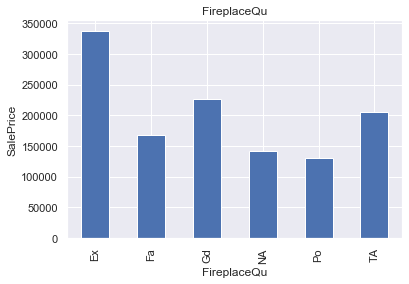

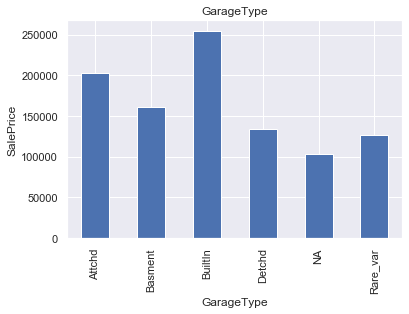

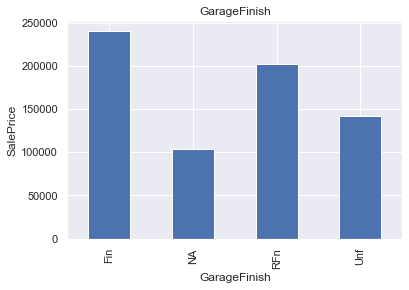

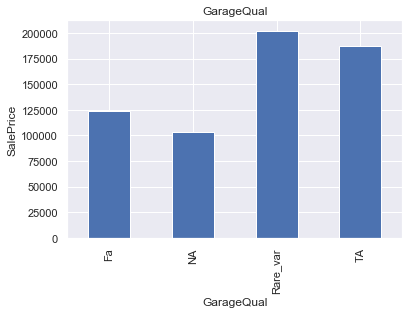

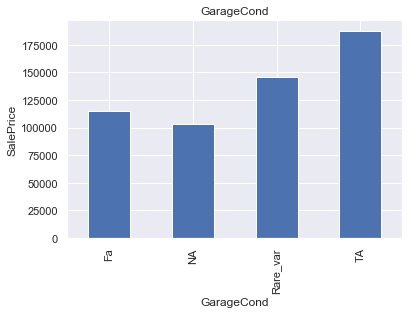

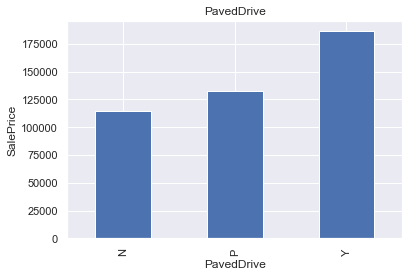

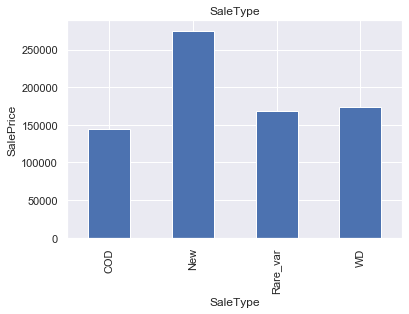

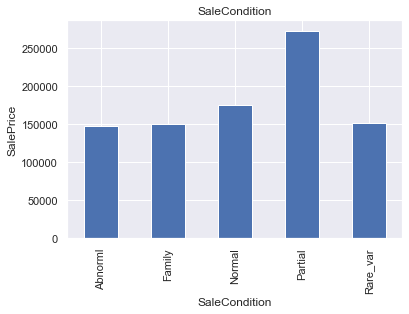

In [29]:
for feature in categorical_features:
    raw_data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.ylabel('SalePrice')
    plt.show()

#### Numerical Features:

In [30]:
numerical_features = [feature for feature in raw_data.columns if raw_data[feature].dtype != 'O']
len(numerical_features)

37

In [31]:
raw_data[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Features

In [32]:
date_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature ]
date_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [33]:
raw_data[date_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


To calculate how old the house is , we will subtract from YrSold.

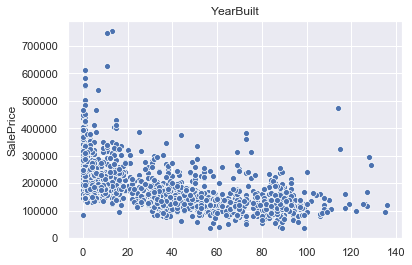

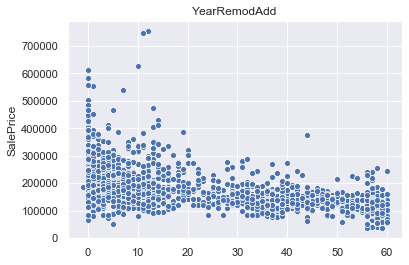

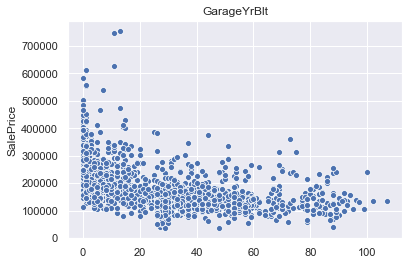

In [34]:
for feature in date_features:
    if feature != 'YrSold' :
        age = raw_data['YrSold'] - raw_data[feature]
        sns.scatterplot(age,raw_data['SalePrice'])
        plt.title(feature)
        plt.ylabel('SalePrice')
        plt.show()

**Observation:** Older houses are more costly.

Creating new features consisting of age of house modifications.

In [35]:
for feature in date_features:
    if feature != 'YrSold' :
        raw_data[feature] = raw_data['YrSold'] - raw_data[feature]

In [36]:
raw_data[date_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


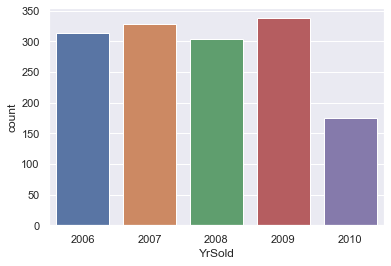

In [37]:
sns.countplot(raw_data['YrSold'])

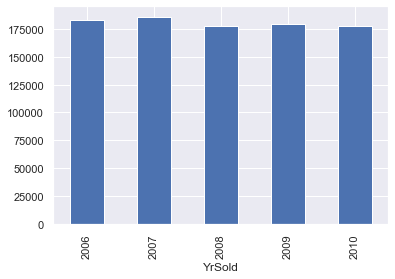

In [38]:
raw_data.groupby('YrSold')['SalePrice'].mean().plot.bar()
plt.show()

In [39]:
raw_data[['YrSold','SalePrice']].corr()

,YrSold,SalePrice
YrSold,1.000000,-0.028923
SalePrice,-0.028923,1.000000


In [40]:
#Dropping YrSold
raw_data = raw_data.drop('YrSold' , axis = 1)


In [41]:
date_features.remove('YrSold')
date_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [42]:
numerical_features.remove('YrSold')

#### Discrete Features:


In [43]:
discrete_features = [feature for feature in numerical_features if len(raw_data[feature].unique()) < 25  and feature not in date_features]
len(discrete_features)

17

In [44]:
raw_data[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


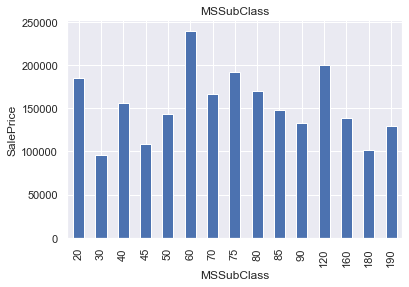

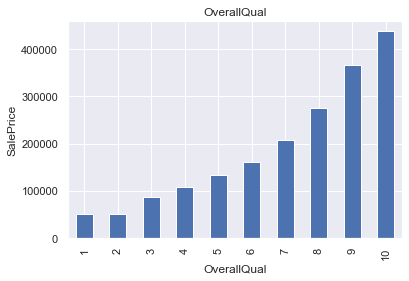

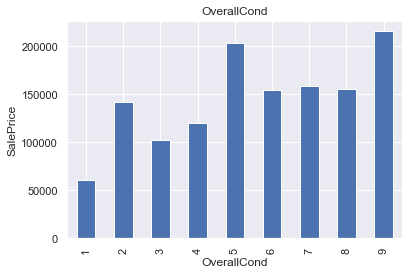

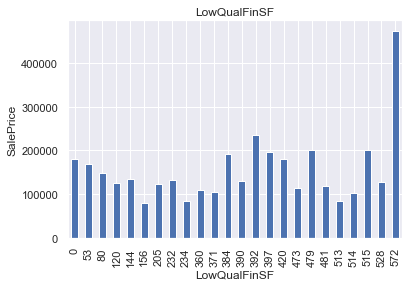

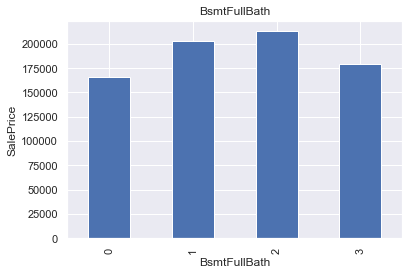

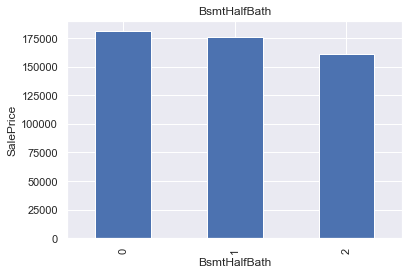

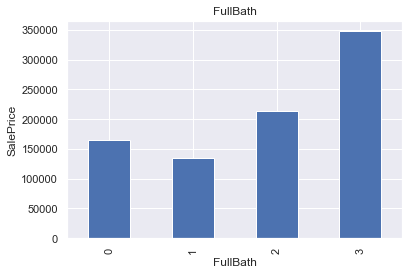

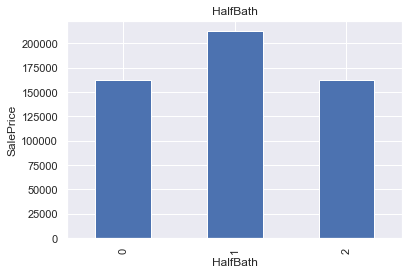

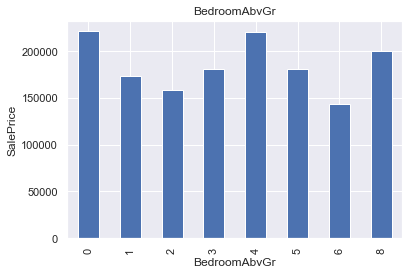

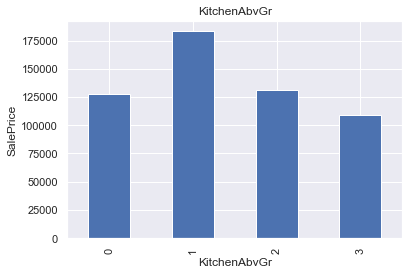

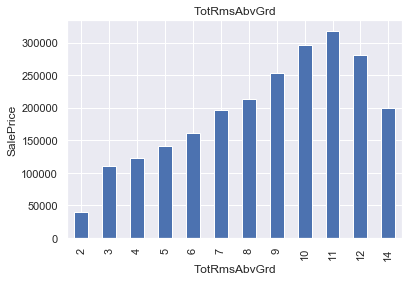

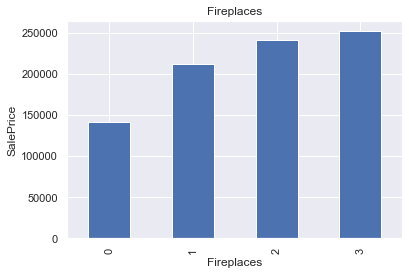

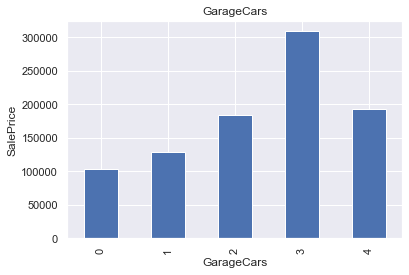

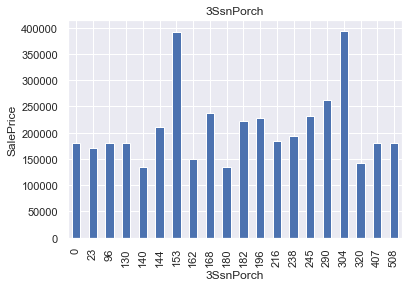

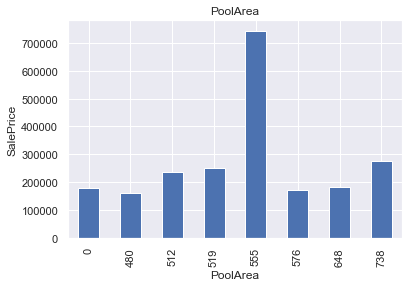

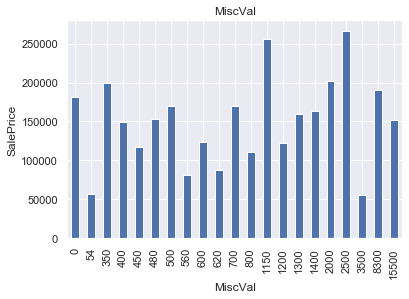

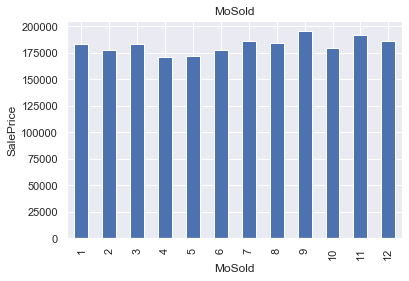

In [45]:
for feature in discrete_features:
    raw_data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Continuous Features:

In [46]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features and feature not in date_features ]
len(continuous_features)

16

In [47]:
raw_data[continuous_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


**Checking distribution of continuous features**

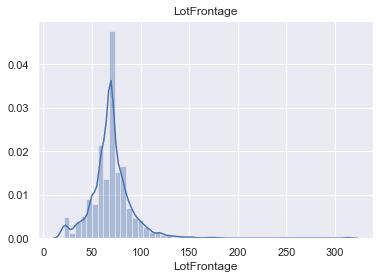

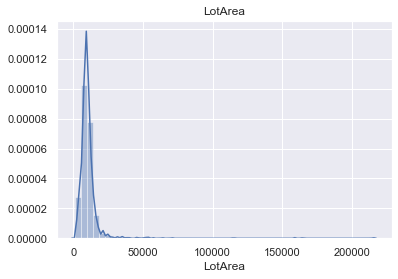

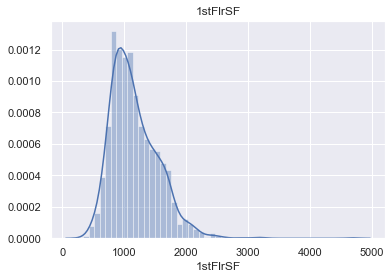

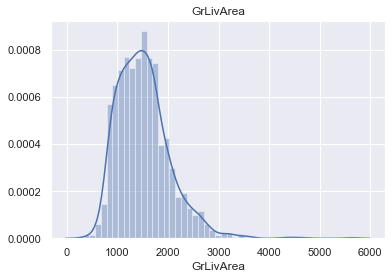

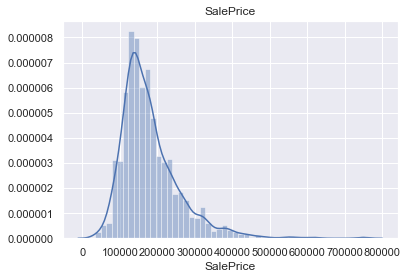

In [48]:
for feature in continuous_features:
    if(0 not in raw_data[feature].unique()):
        sns.distplot(raw_data[feature])
        plt.title(feature)
        plt.show()

Clearly all the distributions are right skewed, so we will apply log normal transformation.

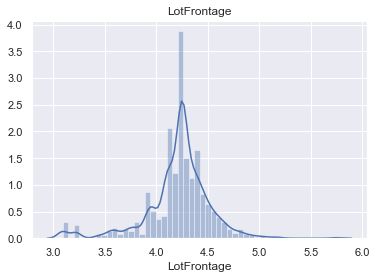

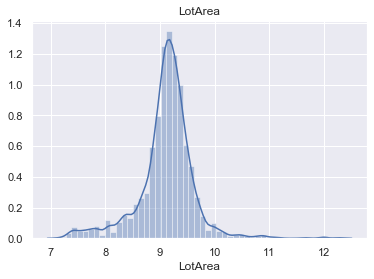

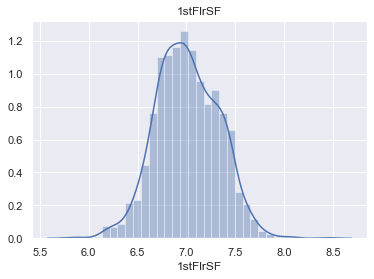

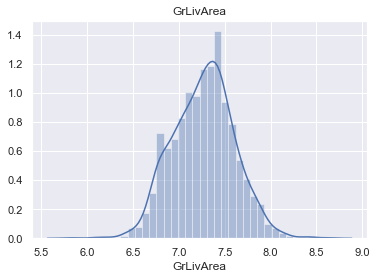

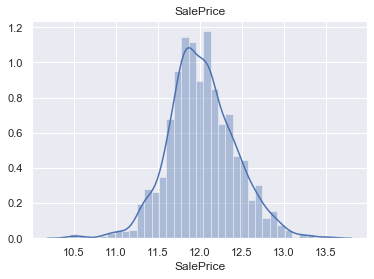

In [49]:
for feature in continuous_features:
    if(0 not in raw_data[feature].unique()):
        sns.distplot(np.log(1+raw_data[feature]))
        plt.title(feature)
        plt.show()

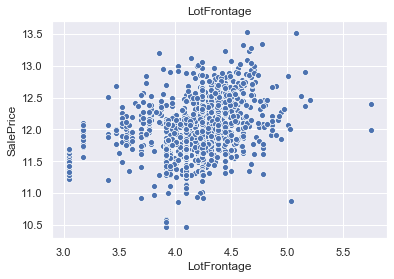

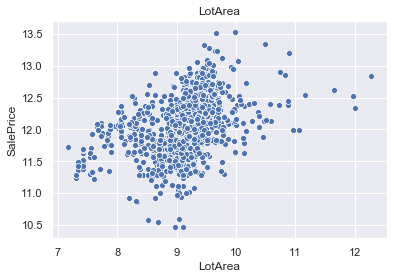

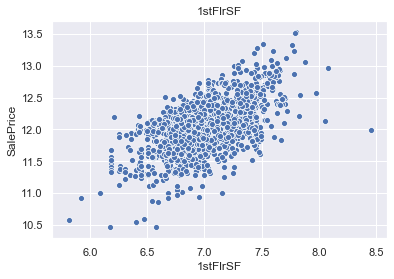

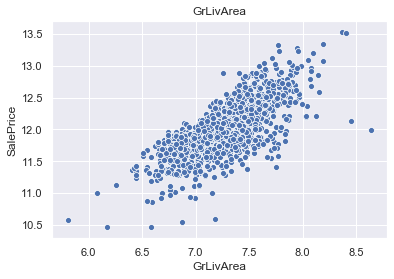

In [50]:
for feature in continuous_features:
    if feature != 'SalePrice' and 0 not in raw_data[feature].unique():
        sns.scatterplot(np.log(raw_data[feature]) , np.log(raw_data['SalePrice']))
        plt.title(feature)
        plt.show()

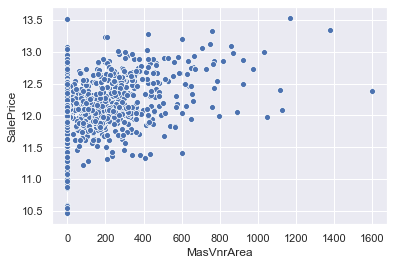

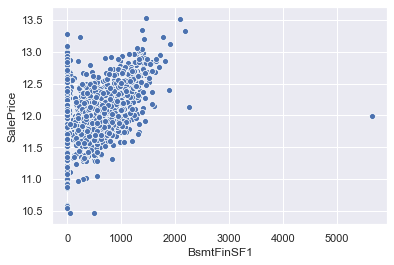

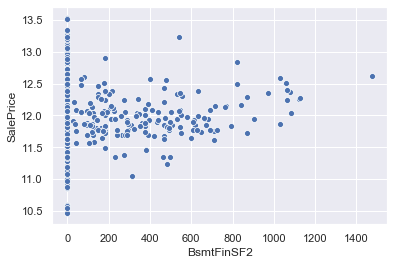

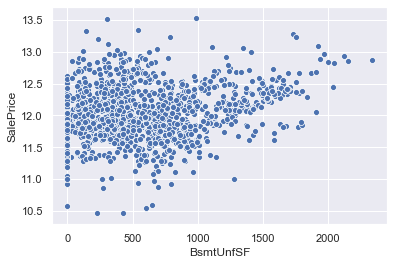

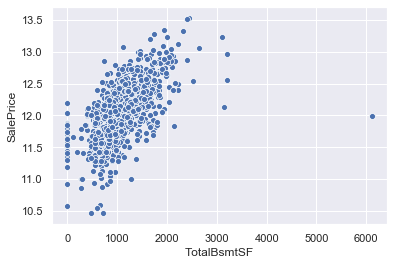

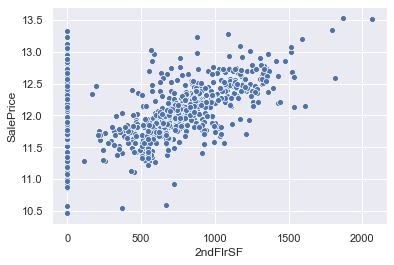

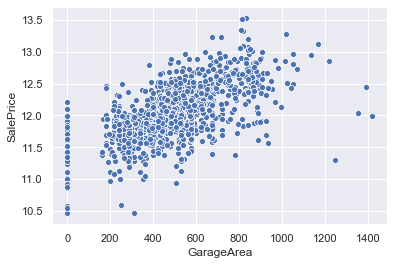

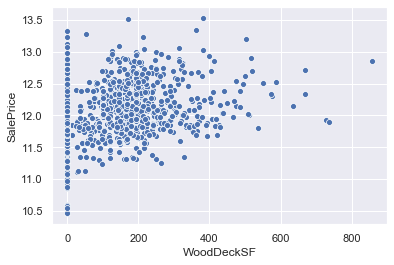

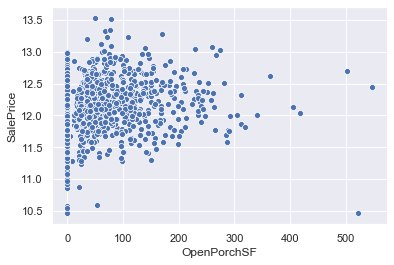

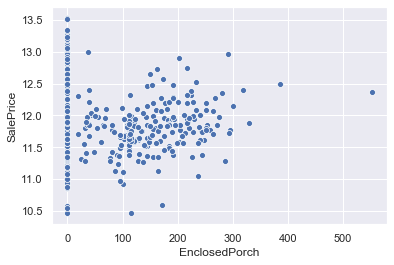

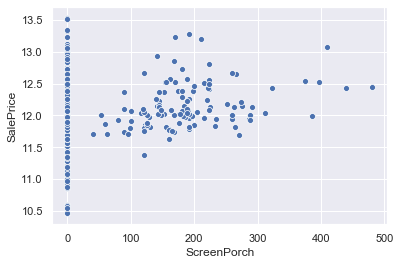

In [51]:
for feature in continuous_features:
    if 0 in raw_data[feature].unique():
        sns.scatterplot(raw_data[feature] , np.log(raw_data['SalePrice']))
        plt.show()

**Saving/applying the log normal transformation**

In [52]:
my_df = raw_data.copy()

In [53]:
for feature in continuous_features:
    if 0 not in my_df[feature].unique():
        my_df[feature] = np.log(my_df[feature])
        print(feature)

LotFrontage
LotArea
1stFlrSF
GrLivArea
SalePrice


In [54]:
my_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,12.429216


### Encoding Categorical Features

In [55]:
for feature in categorical_features:
    my_df[feature] = my_df[feature].astype('category')

### Using One Hot Encoder

In [56]:
one_hot_encoding_features = []
for feature in categorical_features:
    if len(my_df[feature].unique()) <= 2:
        one_hot_encoding_features.append(feature)
one_hot_encoding_features

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'CentralAir']

In [57]:
my_df[one_hot_encoding_features].head(3)

,Street,Utilities,Condition2,RoofMatl,CentralAir
0,Pave,AllPub,Norm,CompShg,Y
1,Pave,AllPub,Norm,CompShg,Y
2,Pave,AllPub,Norm,CompShg,Y


**Creating Dummies**

In [58]:
dum_df = pd.get_dummies(my_df[one_hot_encoding_features])
dum_df.head()

,Street_Pave,Street_Rare_var,Utilities_AllPub,Utilities_Rare_var,Condition2_Norm,Condition2_Rare_var,RoofMatl_CompShg,RoofMatl_Rare_var,CentralAir_N,CentralAir_Y
0,1,0,1,0,1,0,1,0,0,1
1,1,0,1,0,1,0,1,0,0,1
2,1,0,1,0,1,0,1,0,0,1
3,1,0,1,0,1,0,1,0,0,1
4,1,0,1,0,1,0,1,0,0,1


In [59]:
len(dum_df)

1460

**Merge Dummy_df with main_df**

In [60]:
my_df = my_df.join(dum_df)

In [61]:
len(my_df)

1460

### Using Label Encoder

In [62]:
label_encoding_features = [feature for feature in categorical_features if feature not in one_hot_encoding_features]
label_encoding_features

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [63]:
for feature in label_encoding_features:
    my_df[feature] = my_df[feature].cat.codes

In [64]:
my_df[label_encoding_features].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,3,3,3,0,4,2,0,2,0,8,8,1,1,3,2,2,4,4,2,6,0,0,3,2,4,3,0,2,3,3,2,3,2
1,2,3,3,2,0,16,1,0,1,0,4,4,2,3,3,1,2,4,1,0,6,0,0,3,3,4,5,0,2,3,3,2,3,2
2,2,0,3,3,0,4,2,0,2,0,8,8,1,1,3,2,2,4,2,2,6,0,0,3,2,4,5,0,2,3,3,2,3,2
3,2,0,3,0,0,5,2,0,2,0,9,10,2,3,3,0,4,1,4,0,6,0,2,3,2,4,2,3,3,3,3,2,3,0
4,2,0,3,2,0,13,2,0,2,0,8,8,1,1,3,2,2,4,0,2,6,0,0,3,2,4,5,0,2,3,3,2,3,2


### Feature Scaling - Normalization

In [65]:
feature_scale = [feature for feature in my_df.columns if feature not in ['SalePrice']+one_hot_encoding_features]
len(feature_scale)

79

In [66]:
len(my_df.columns)

85

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(my_df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [68]:
#transform the data and add on the ID and SalePrice variables
data = pd.concat([my_df[['SalePrice']].reset_index(drop = True),
                 pd.DataFrame(scaler.transform(my_df[feature_scale]) , columns = feature_scale)], axis =1)

In [69]:
data.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,Street_Pave,Street_Rare_var,Utilities_AllPub,Utilities_Rare_var,Condition2_Norm,Condition2_Rare_var,RoofMatl_CompShg,RoofMatl_Rare_var,CentralAir_N,CentralAir_Y
0,12.247694,0.235294,0.5,0.418208,0.366344,1.0,1.0,0.75,0.0,0.181818,0.4,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.8,0.8,0.25,0.12250,0.333333,1.0,0.50,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,1.0,0.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,12.109011,0.000000,0.5,0.495064,0.391317,1.0,1.0,0.50,0.0,0.727273,0.2,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.4,0.4,0.50,0.00000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,1.0,0.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,12.317167,0.235294,0.5,0.434909,0.422359,0.0,1.0,0.75,0.0,0.181818,0.4,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.8,0.8,0.25,0.10125,0.333333,1.0,0.50,0.5,1.00,0.50,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,1.0,0.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,11.849398,0.294118,0.5,0.388581,0.390295,0.0,1.0,0.00,0.0,0.227273,0.4,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.9,1.0,0.50,0.00000,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.5,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,12.429216,0.235294,0.5,0.513123,0.468761,0.0,1.0,0.50,0.0,0.590909,0.4,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.8,0.8,0.25,0.21875,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,1.0,0.5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [70]:
len(data)

1460

### Feature Selection

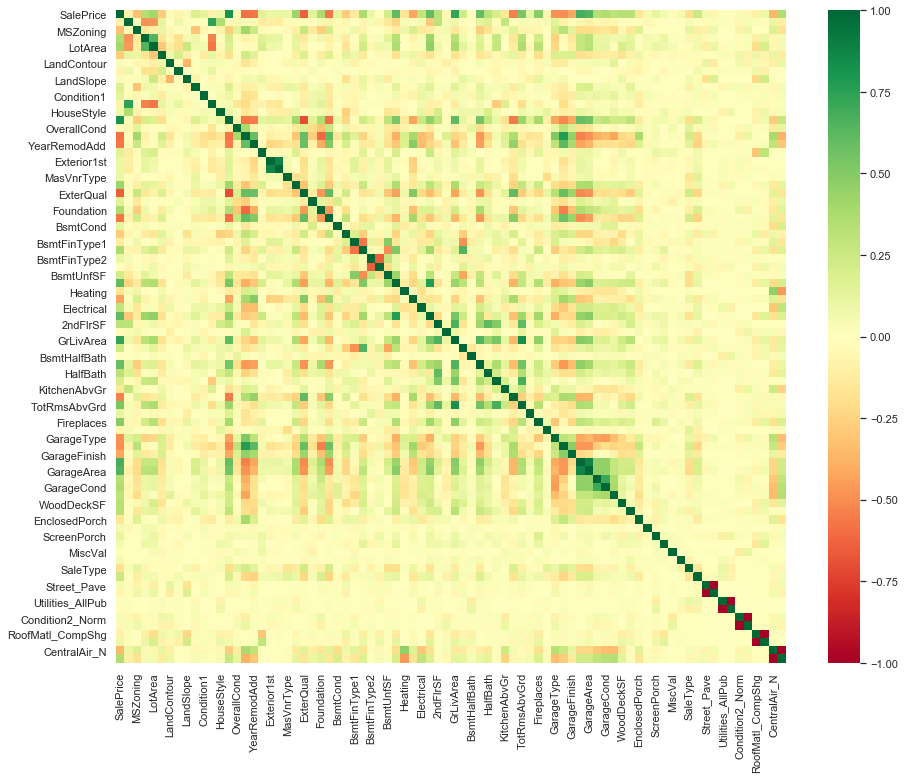

In [71]:
plt.figure(figsize = (15,12))
sns.heatmap(data.corr(),cmap="RdYlGn")

In [72]:
dataset = data.copy()

In [73]:
#Capture the dependent feature
y_train = pd.DataFrame(dataset['SalePrice'])
y_train.columns = ['SalePrice']
#Capture the independent features
X_train = dataset.drop(['SalePrice'],axis = 1)

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

In [75]:
len(principalDf)

1460

In [76]:
pca.explained_variance_

array([0.6606487 , 0.26299884, 0.21635378, 0.17646436, 0.15946916,
       0.1302516 , 0.12352006, 0.11017057, 0.10680408, 0.09814334])

The first 3 components are explaining most of the data, so we will take 3 PCA.

In [77]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents , columns = ['PCA1','PCA2','PCA3','PCA4'])

In [78]:
principalDf

,PCA1,PCA2,PCA3,PCA4
0,0.596789,0.348037,-0.375192,-0.384480
1,0.090055,-0.416470,-0.493782,-0.036932
2,0.918584,-0.269586,0.291323,-0.022904
3,-0.355184,-0.482037,0.621163,-0.073691
4,1.152113,-0.412693,0.324435,0.153306
...,...,...,...,...
1455,0.261477,0.556233,-0.082276,-0.608558
1456,-0.356684,-0.570915,-0.443522,-0.409146
1457,0.209489,0.285152,-0.218140,-0.272137
1458,-0.601451,-0.291869,-0.352900,-0.035333


In [79]:
len(principalDf)

1460

In [80]:
len(y_train)

1460

In [81]:
Y = y_train

In [82]:
principalDf.iloc[1:4]

,PCA1,PCA2,PCA3,PCA4
1,0.090055,-0.416470,-0.493782,-0.036932
2,0.918584,-0.269586,0.291323,-0.022904
3,-0.355184,-0.482037,0.621163,-0.073691


In [83]:
crossv_df = principalDf.join(y_train)

### Train Test Split

In [84]:
#Doing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDf, y_train, test_size=0.25, random_state=42)

In [85]:
X_train.shape , X_test.shape

((1095, 4), (365, 4))

In [86]:
y_train.shape , y_test.shape

((1095, 1), (365, 1))

In [87]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
# Predicting the Test set results
y_pred = pd.DataFrame(regressor.predict(X_test),columns = ['Predicted'])

In [89]:
y_pred.head()

,Predicted
0,11.861100
1,12.493998
2,11.623293
3,11.805723
4,12.621845


In [90]:
df = pd.concat([y_test.reset_index(drop=True),y_pred],axis = 1)

In [91]:
df['SalePrice'] = np.exp(df['SalePrice'])
df['Predicted'] = np.exp(df['Predicted'])

In [92]:
df

,SalePrice,Predicted
0,154500.0,141647.989082
1,325000.0,266731.547342
2,115000.0,111668.815664
3,159000.0,134017.190090
4,315500.0,303108.284926
...,...,...
360,195000.0,182983.140154
361,120000.0,141609.880371
362,228500.0,221131.223919
363,248000.0,227251.114508


In [93]:
from sklearn import metrics

In [94]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1715939423141016
Mean Squared Error: 0.049104821852955845
Root Mean Squared Error: 0.22159607815337312


In [95]:
regressor.score(X_test,y_test)

0.7164184012084529

## Processing Actual Test Data

#### Loading Data

In [96]:
raw_data = pd.read_csv('test.csv')

In [97]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [98]:
raw_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [99]:
id_data = pd.DataFrame(raw_data['Id'])

In [100]:
raw_data = raw_data.drop('Id' , axis = 1)

In [101]:
features_with_na = [feature for feature in raw_data.columns if raw_data[feature].isna().sum()>=1]
features_with_na,len(features_with_na)

(['MSZoning',
  'LotFrontage',
  'Alley',
  'Utilities',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinSF1',
  'BsmtFinType2',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageCars',
  'GarageArea',
  'GarageQual',
  'GarageCond',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'SaleType'],
 33)

In [102]:
for feature in features_with_na:
    if raw_data[feature].isna().sum() > 0:
        perc = np.round((raw_data[feature].isna().sum()/len(raw_data))*100,2)
        print('{} ({}) : {}%'.format(feature,raw_data[feature].dtype,perc))

MSZoning (object) : 0.27%
LotFrontage (float64) : 15.56%
Alley (object) : 92.67%
Utilities (object) : 0.14%
Exterior1st (object) : 0.07%
Exterior2nd (object) : 0.07%
MasVnrType (object) : 1.1%
MasVnrArea (float64) : 1.03%
BsmtQual (object) : 3.02%
BsmtCond (object) : 3.08%
BsmtExposure (object) : 3.02%
BsmtFinType1 (object) : 2.88%
BsmtFinSF1 (float64) : 0.07%
BsmtFinType2 (object) : 2.88%
BsmtFinSF2 (float64) : 0.07%
BsmtUnfSF (float64) : 0.07%
TotalBsmtSF (float64) : 0.07%
BsmtFullBath (float64) : 0.14%
BsmtHalfBath (float64) : 0.14%
KitchenQual (object) : 0.07%
Functional (object) : 0.14%
FireplaceQu (object) : 50.03%
GarageType (object) : 5.21%
GarageYrBlt (float64) : 5.35%
GarageFinish (object) : 5.35%
GarageCars (float64) : 0.07%
GarageArea (float64) : 0.07%
GarageQual (object) : 5.35%
GarageCond (object) : 5.35%
PoolQC (object) : 99.79%
Fence (object) : 80.12%
MiscFeature (object) : 96.5%
SaleType (object) : 0.07%


In [103]:
raw_data = raw_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis = 1)

In [104]:
features_with_na = [feature for feature in raw_data.columns if raw_data[feature].isna().sum()>0]
len(features_with_na)

29

#### Categorical Values with NA

In [105]:
for feature in features_with_na:
    if raw_data[feature].dtype == 'O':
        print(feature)
        raw_data[feature] = raw_data[feature].fillna('NA')

MSZoning
Utilities
Exterior1st
Exterior2nd
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
SaleType


#### Numerical Values with NA

In [106]:
for feature in features_with_na:
    if raw_data[feature].dtype != 'O':
        print(feature)

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


In [107]:
for feature in features_with_na:
    if raw_data[feature].dtype != 'O':
        raw_data[feature] = raw_data[feature].fillna(raw_data[feature].mean())

In [108]:
raw_data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [109]:
raw_data['SaleType'].mode()

0    WD
dtype: object

In [110]:
raw_data['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
NA          1
Name: SaleType, dtype: int64

In [111]:
categorical_features = [feature for feature in raw_data.columns if raw_data[feature].dtype == 'O']
len(categorical_features)

39

In [112]:
numerical_features = [feature for feature in raw_data.columns if raw_data[feature].dtype != 'O']
len(numerical_features)

36

In [113]:
date_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature ]
date_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [114]:
for feature in date_features:
    if feature != 'YrSold' :
        raw_data[feature] = raw_data['YrSold'] - raw_data[feature]

In [115]:
raw_data[date_features+['YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YrSold
0,49,49,49.0,2010,2010
1,52,52,52.0,2010,2010
2,13,12,13.0,2010,2010
3,12,12,12.0,2010,2010
4,18,18,18.0,2010,2010


In [116]:
#Dropping YrSold
raw_data = raw_data.drop('YrSold' , axis = 1)


In [117]:
date_features.remove('YrSold')
date_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [118]:
numerical_features.remove('YrSold')

In [119]:
discrete_features = [feature for feature in numerical_features if len(raw_data[feature].unique()) < 25  and feature not in date_features]
len(discrete_features)

16

In [120]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features and feature not in date_features ]
len(continuous_features)

16

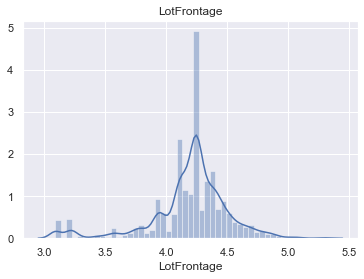

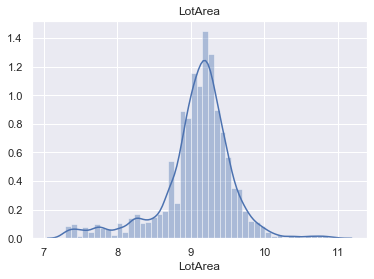

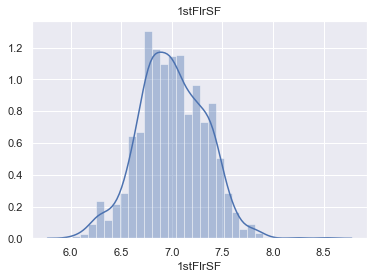

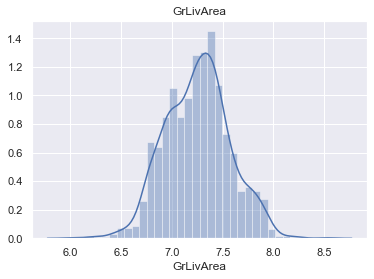

In [121]:
for feature in continuous_features:
    if(0 not in raw_data[feature].unique()):
        sns.distplot(np.log(1+raw_data[feature]))
        plt.title(feature)
        plt.show()

**Saving/applying the log normal transformation**

In [122]:
my_df = raw_data.copy()

In [123]:
for feature in continuous_features:
    if 0 not in my_df[feature].unique():
        my_df[feature] = np.log(my_df[feature])
        print(feature)

LotFrontage
LotArea
1stFlrSF
GrLivArea


### Encoding Categorical Features using Label Encoder

In [124]:
for feature in categorical_features:
    my_df[feature] = my_df[feature].astype('category')

In [125]:
one_hot_encoding_features = []
for feature in categorical_features:
    if len(my_df[feature].unique()) <= 2:
        one_hot_encoding_features.append(feature)
one_hot_encoding_features

['Street', 'Utilities', 'CentralAir']

In [126]:
dum_df = pd.get_dummies(my_df[one_hot_encoding_features])
dum_df.head()

,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NA,CentralAir_N,CentralAir_Y
0,0,1,1,0,0,1
1,0,1,1,0,0,1
2,0,1,1,0,0,1
3,0,1,1,0,0,1
4,0,1,1,0,0,1


In [127]:
my_df = my_df.join(dum_df)

In [128]:
label_encoding_features = [feature for feature in categorical_features if feature not in one_hot_encoding_features]
label_encoding_features

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [129]:
for feature in label_encoding_features:
    my_df[feature] = my_df[feature].cat.codes

In [130]:
my_df[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,Pave,3,3,AllPub,4,0,12,1,2,0,2,1,0,11,13,3,3,4,1,4,4,4,5,3,0,4,Y,3,4,7,3,1,3,4,5,2,9,4
1,4,Pave,0,3,AllPub,0,0,12,2,2,0,2,3,0,12,14,1,3,4,1,4,4,4,0,6,0,4,Y,3,2,7,3,1,3,4,5,2,9,4
2,4,Pave,0,3,AllPub,4,0,8,2,2,0,4,1,0,11,13,3,3,4,2,2,4,4,2,6,0,2,Y,3,4,7,5,1,0,4,5,2,9,4
3,4,Pave,0,3,AllPub,4,0,8,2,2,0,4,1,0,11,13,1,3,4,2,4,4,4,2,6,0,0,Y,3,2,7,2,1,0,4,5,2,9,4
4,4,Pave,0,1,AllPub,4,0,22,2,2,4,2,1,0,6,6,3,2,4,2,2,4,4,0,6,0,0,Y,3,2,7,3,1,2,4,5,2,9,4


## Feature Scaling - Normalization

In [131]:
feature_scale = [feature for feature in my_df.columns if feature not in ['SalePrice']+one_hot_encoding_features]
len(feature_scale)

77

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(my_df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [133]:
#transform the data and add on the ID and SalePrice variables
data = pd.DataFrame(scaler.transform(my_df[feature_scale]), columns = feature_scale)

In [134]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NA,CentralAir_N,CentralAir_Y
0,0.000000,0.6,0.593445,0.566360,1.0,1.000000,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.444444,0.625,0.384615,0.822581,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.2,1.0,1.0,1.0,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,0.8,0.0,1.0,1.0,0.0,0.0,1.0
1,0.000000,0.8,0.598957,0.622527,0.0,1.000000,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.555556,0.625,0.407692,0.870968,0.6,0.0,0.923077,0.933333,0.25,0.083721,1.000000,1.0,0.2,1.0,1.0,1.0,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,0.8,0.0,1.0,1.0,0.0,0.0,1.0
2,0.235294,0.8,0.558854,0.614005,0.0,1.000000,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.444444,0.500,0.107692,0.225806,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.4,0.5,1.0,1.0,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,0.8,0.0,1.0,1.0,0.0,0.0,1.0
3,0.235294,0.8,0.582212,0.524583,0.0,1.000000,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.555556,0.625,0.100000,0.225806,0.2,0.0,0.846154,0.866667,0.25,0.015504,1.000000,1.0,0.4,1.0,1.0,1.0,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.0,0.8,0.0,1.0,1.0,0.0,0.0,1.0
4,0.588235,0.8,0.317987,0.335596,0.0,0.333333,1.0,0.0,0.916667,0.250,0.5,1.0,0.333333,0.777778,0.500,0.146154,0.322581,0.2,0.0,0.461538,0.400000,0.75,0.000000,0.666667,1.0,0.4,0.5,1.0,1.0,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.000000,0.000000,1.0,0.8,0.0,1.0,1.0,0.0,0.0,1.0


## Feature Selection - Dimensionality Reduction

In [135]:
dataset = data.copy()

In [136]:
#Capture the independent features
X_train = dataset

In [137]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

In [138]:
pca.explained_variance_

array([0.66046095, 0.25117402, 0.21293974, 0.183469  , 0.16673241,
       0.14008674, 0.12188533, 0.12093211, 0.10919434, 0.10063463])

In [139]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents , columns = ['PCA1','PCA2','PCA3','PCA4'])

In [140]:
principalDf

,PCA1,PCA2,PCA3,PCA4
0,-0.878251,-0.347137,-0.120791,-0.473645
1,-0.198413,-0.979674,0.757214,-0.352376
2,0.541366,-0.333270,0.149797,-0.135497
3,0.762000,-0.084120,0.127588,-0.294395
4,0.645184,-0.244405,-0.370920,0.386988
...,...,...,...,...
1454,-0.791895,0.462607,-0.740117,0.462180
1455,-0.988444,-0.116007,-0.917392,0.367922
1456,-0.363581,-0.138045,-0.355344,-0.575123
1457,-0.321152,-0.177410,-0.354732,0.673591


In [141]:
y_pred = regressor.predict(principalDf)

In [142]:
type(y_pred)

numpy.ndarray

In [143]:
y_pred = pd.DataFrame(y_pred, columns = ['SalePrice'])

In [144]:
len(y_pred)

1459

In [145]:
y_pred

,SalePrice
0,11.765294
1,12.083445
2,12.282670
3,12.370539
4,12.237182
...,...
1454,11.609700
1455,11.579294
1456,11.957046
1457,11.821566


In [146]:
y_pred['SalePrice'] = np.exp(y_pred['SalePrice'])

In [147]:
y_pred

,SalePrice
0,128707.070617
1,176918.655119
2,215921.379654
3,235752.718991
4,206319.622999
...,...
1454,110161.227409
1455,106862.092361
1456,155911.775868
1457,136157.221746


In [148]:
results = pd.DataFrame(columns = ['Id','SalePrice'])

In [149]:
results = pd.DataFrame(pd.concat([id_data.reset_index(drop = True) , y_pred] , axis = 1))

In [150]:
results

,Id,SalePrice
0,1461,128707.070617
1,1462,176918.655119
2,1463,215921.379654
3,1464,235752.718991
4,1465,206319.622999
...,...,...
1454,2915,110161.227409
1455,2916,106862.092361
1456,2917,155911.775868
1457,2918,136157.221746


In [151]:
results.to_csv('Output_results.csv' , index = False)